In [1]:
import h5py
import numpy as np
import matplotlib
from matplotlib.lines import Line2D
import matplotlib.pyplot as plt
import seaborn as sns
import matplotlib.colors as mcolors
import pandas as pd
from pandas import HDFStore,DataFrame
import time
import os

In [18]:
#Reading the file

sample_name = "split_file_14000000_20999999"

f = h5py.File("/lstore/calo/martafsilva/XbbSamples2023/samplesMar28/%s.h5"%sample_name,'r')

#Getting the keys 

f.keys()

<KeysViewHDF5 ['jets', 'subjets', 'tracks']>

# Dataframes

In [19]:
#Creating a dataframe for the jets 
jets_df = pd.DataFrame(np.array(f['jets']))


In [20]:
# Creating a dataframe for the subjet 1
subjet1_df = pd.DataFrame(f['subjets'][:,0])


#Changing the name of the columns

subjet1_df = subjet1_df.rename(columns={
    'pt': 'pt_1', 
    'eta': 'eta_1', 
    'mass': 'mass_1', 
    'HadronConeExclTruthLabelID': 'HadronConeExclTruthLabelID_1',
    'deta': 'deta_1',
    'dphi': 'dphi_1',
    'valid': 'valid_1',
    'DL1r_pu': 'DL1r_pu_1',
    'DL1r_pc': 'DL1r_pc_1',
    'DL1r_pb': 'DL1r_pb_1',
    'DL1dv01_VR_pu': 'DL1dv01_VR_pu_1',
    'DL1dv01_VR_pc': 'DL1dv01_VR_pc_1',
    'DL1dv01_VR_pb': 'DL1dv01_VR_pb_1',
    'GN2v00_pu': 'GN2v00_pu_1',
    'GN2v00_pc': 'GN2v00_pc_1',
    'GN2v00_pb': 'GN2v00_pb_1',
    'energy': 'energy_1',
    'relativeDeltaRToVRJet': 'relativeDeltaRToVRJet_1',
    'deltaRToVRJet': 'deltaRToVRJet_1',
    'HadronConeExclExtendedTruthLabelID': 'HadronConeExclExtendedTruthLabelID_1',
    'HadronGhostTruthLabelID': 'HadronGhostTruthLabelID_1',
    'HadronGhostExtendedTruthLabelID': 'HadronGhostExtendedTruthLabelID_1',
    'dr': 'dr_1'
})


In [21]:
subjet1_df.columns

Index(['DL1dv01_VR_pu_1', 'DL1dv01_VR_pc_1', 'DL1dv01_VR_pb_1', 'GN2v00_pu_1',
       'GN2v00_pc_1', 'GN2v00_pb_1', 'pt_1', 'eta_1', 'energy_1', 'mass_1',
       'HadronConeExclTruthLabelID_1', 'HadronConeExclExtendedTruthLabelID_1',
       'deta_1', 'dphi_1', 'dr_1', 'valid_1'],
      dtype='object')

In [22]:
# Creating a dataframe for the subjet 2
subjet2_df = pd.DataFrame(f['subjets'][:,1])


#Changing the name of the columns
subjet2_df = subjet2_df.rename(columns={
    'pt': 'pt_2', 
    'eta': 'eta_2', 
    'mass': 'mass_2', 
    'HadronConeExclTruthLabelID': 'HadronConeExclTruthLabelID_2',
    'deta': 'deta_2',
    'dphi': 'dphi_2',
    'valid': 'valid_2',
    'DL1r_pu': 'DL1r_pu_2',
    'DL1r_pc': 'DL1r_pc_2',
    'DL1r_pb': 'DL1r_pb_2',
    'DL1dv01_VR_pu': 'DL1dv01_VR_pu_2',
    'DL1dv01_VR_pc': 'DL1dv01_VR_pc_2',
    'DL1dv01_VR_pb': 'DL1dv01_VR_pb_2',
    'GN2v00_pu': 'GN2v00_pu_2',
    'GN2v00_pc': 'GN2v00_pc_2',
    'GN2v00_pb': 'GN2v00_pb_2',
    'energy': 'energy_2',
    'relativeDeltaRToVRJet': 'relativeDeltaRToVRJet_2',
    'deltaRToVRJet': 'deltaRToVRJet_2',
    'HadronConeExclExtendedTruthLabelID': 'HadronConeExclExtendedTruthLabelID_2',
    'HadronGhostTruthLabelID': 'HadronGhostTruthLabelID_2',
    'HadronGhostExtendedTruthLabelID': 'HadronGhostExtendedTruthLabelID_2',
    'dr': 'dr_2'
})

subjet2_df

,DL1dv01_VR_pu_2,DL1dv01_VR_pc_2,DL1dv01_VR_pb_2,GN2v00_pu_2,GN2v00_pc_2,GN2v00_pb_2,pt_2,eta_2,energy_2,mass_2,HadronConeExclTruthLabelID_2,HadronConeExclExtendedTruthLabelID_2,deta_2,dphi_2,dr_2,valid_2
0,0.648397,0.292673,0.058871,0.664944,0.303047,0.032009,27079.144531,-1.176220,48218.632812,3747.615479,0,0,0.558898,0.320385,0.644215,True
1,0.390002,0.397365,0.212462,0.417242,0.469366,0.113392,70867.726562,-0.102708,71838.187500,9237.133789,0,0,-0.018890,-0.046094,0.049814,True
2,0.289715,0.548925,0.161205,0.001057,0.933289,0.065653,214093.578125,-0.205900,218700.187500,4783.054199,4,4,-0.002645,0.089332,0.089371,True
3,0.449703,0.425067,0.125116,0.396522,0.463091,0.140387,21913.867188,-0.257300,22896.498047,3395.901123,0,0,0.398749,0.147638,0.425203,True
4,0.759236,0.224281,0.016380,0.758838,0.223005,0.018157,84859.609375,1.241108,159133.140625,5191.684082,0,0,0.366762,-0.427399,0.563191,True
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
6999995,0.777609,0.199464,0.022862,0.746242,0.239305,0.014452,28683.896484,-1.587543,73275.851562,5234.859375,0,0,-0.060408,0.020326,0.063736,True
6999996,0.614575,0.326756,0.058599,0.756798,0.202978,0.040224,51492.113281,1.002831,79784.632812,4995.147949,0,0,-0.358296,-0.025105,0.359175,True
6999997,0.007337,0.492203,0.500340,0.000177,0.120042,0.879781,83198.710938,1.285409,162355.218750,11699.938477,5,5,-0.350838,0.152293,0.382466,True
6999998,0.002207,0.775979,0.221487,0.000063,0.962875,0.037062,98642.007812,0.277663,102510.531250,2918.295898,5,5,-0.039934,0.177874,0.182301,True


In [23]:
# # Creating a dataframe for the subjet 3
subjet3_df = pd.DataFrame(f['subjets'][:,2])

#Changing the name of the columns
subjet3_df = subjet3_df.rename(columns={
    'pt': 'pt_3', 
    'eta': 'eta_3', 
    'mass': 'mass_3', 
    'HadronConeExclTruthLabelID': 'HadronConeExclTruthLabelID_3',
    'deta': 'deta_3',
    'dphi': 'dphi_3',
    'valid': 'valid_3',
    'DL1r_pu': 'DL1r_pu_3',
    'DL1r_pc': 'DL1r_pc_3',
    'DL1r_pb': 'DL1r_pb_3',
    'DL1dv01_VR_pu': 'DL1dv01_VR_pu_3',
    'DL1dv01_VR_pc': 'DL1dv01_VR_pc_3',
    'DL1dv01_VR_pb': 'DL1dv01_VR_pb_3',
    'GN2v00_pu': 'GN2v00_pu_3',
    'GN2v00_pc': 'GN2v00_pc_3',
    'GN2v00_pb': 'GN2v00_pb_3',
    'energy': 'energy_3',
    'relativeDeltaRToVRJet': 'relativeDeltaRToVRJet_3',
    'deltaRToVRJet': 'deltaRToVRJet_3',
    'HadronConeExclExtendedTruthLabelID': 'HadronConeExclExtendedTruthLabelID_3',
    'HadronGhostTruthLabelID': 'HadronGhostTruthLabelID_3',
    'HadronGhostExtendedTruthLabelID': 'HadronGhostExtendedTruthLabelID_3',
    'dr': 'dr_3'
})
subjet3_df


,DL1dv01_VR_pu_3,DL1dv01_VR_pc_3,DL1dv01_VR_pb_3,GN2v00_pu_3,GN2v00_pc_3,GN2v00_pb_3,pt_3,eta_3,energy_3,mass_3,HadronConeExclTruthLabelID_3,HadronConeExclExtendedTruthLabelID_3,deta_3,dphi_3,dr_3,valid_3
0,0.427572,0.305304,0.266980,0.350678,0.283942,0.365379,10738.777344,-2.473236,64157.199219,1580.015869,0,0,-0.738118,0.640494,0.977267,True
1,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,0,0,0.000000,0.000000,0.000000,False
2,0.459205,0.418089,0.122595,0.499687,0.365183,0.135130,9824.498047,-0.040497,9878.943359,956.228271,0,0,0.162759,-0.264760,0.310787,True
3,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,0,0,0.000000,0.000000,0.000000,False
4,0.532740,0.368602,0.098566,0.471572,0.409897,0.118531,12711.034180,0.704464,16188.161133,2475.933594,0,0,-0.169882,-0.103099,0.198720,True
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
6999995,0.674607,0.262170,0.063117,0.729283,0.213372,0.057345,12913.825195,-1.740576,38026.382812,2544.970215,0,0,-0.213441,0.399223,0.452698,True
6999996,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,0,0,0.000000,0.000000,0.000000,False
6999997,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,0,0,0.000000,0.000000,0.000000,False
6999998,0.504747,0.450676,0.044433,0.225001,0.755528,0.019471,79519.695312,0.011992,79805.148438,6676.107422,4,4,-0.305605,-0.086278,0.317550,True


In [24]:
#Combinaning the 4 dataframes (jet + 3subjets) in one
subjets_df= pd.concat([jets_df,subjet1_df, subjet2_df, subjet3_df], axis=1)
#subjets_df = subjets_df.dropna().reset_index(drop=True)


subjets_df

,pt,eta,abs_eta,mass,Xbb2020v3_Higgs,Xbb2020v3_QCD,Xbb2020v3_Top,R10TruthLabel_R22v1_TruthJetMass,R10TruthLabel_R22v1_TruthJetPt,R10TruthLabel_R22v1,...,pt_3,eta_3,energy_3,mass_3,HadronConeExclTruthLabelID_3,HadronConeExclExtendedTruthLabelID_3,deta_3,dphi_3,dr_3,valid_3
0,647333.68750,0.041547,0.041547,117092.453125,0.808967,0.027477,0.163556,156972.921875,650207.56250,11,...,10738.777344,-2.473236,64157.199219,1580.015869,0,0,-0.738118,0.640494,0.977267,True
1,390164.75000,1.215928,1.215928,87238.296875,0.032929,0.104878,0.862193,88123.945312,371226.25000,12,...,NaN,NaN,NaN,NaN,0,0,0.000000,0.000000,0.000000,False
2,521331.12500,-0.967268,0.967268,133780.656250,0.519260,0.264774,0.215966,117414.601562,472531.46875,12,...,9824.498047,-0.040497,9878.943359,956.228271,0,0,0.162759,-0.264760,0.310787,True
3,384806.46875,-0.307529,0.307529,148489.890625,0.004589,0.953064,0.042347,156023.093750,377838.96875,12,...,NaN,NaN,NaN,NaN,0,0,0.000000,0.000000,0.000000,False
4,391254.25000,1.989323,1.989323,146562.609375,0.011536,0.747039,0.241425,167221.093750,386051.81250,10,...,12711.034180,0.704464,16188.161133,2475.933594,0,0,-0.169882,-0.103099,0.198720,True
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
6999995,556603.93750,-0.957447,0.957447,131896.531250,0.005493,0.601845,0.392662,150695.593750,566027.12500,10,...,12913.825195,-1.740576,38026.382812,2544.970215,0,0,-0.213441,0.399223,0.452698,True
6999996,789249.12500,-0.045341,0.045341,114225.757812,0.043031,0.364546,0.592423,211811.078125,816727.75000,10,...,NaN,NaN,NaN,NaN,0,0,0.000000,0.000000,0.000000,False
6999997,587959.87500,-0.286008,0.286008,54946.085938,0.501760,0.051749,0.446491,150030.640625,591426.00000,11,...,NaN,NaN,NaN,NaN,0,0,0.000000,0.000000,0.000000,False
6999998,291408.37500,0.568252,0.568252,69745.171875,0.537927,0.040822,0.421251,214058.437500,366669.81250,1,...,79519.695312,0.011992,79805.148438,6676.107422,4,4,-0.305605,-0.086278,0.317550,True


In [25]:
subjets_df.to_hdf('%s.h5'%sample_name, key='table', mode='w')

In [49]:
# sample_name = "train"

# subjets_df = jets_df = pd.read_hdf('pp_output_%s.h5'%sample_name, key='table')

# Jet Plots

### Mass

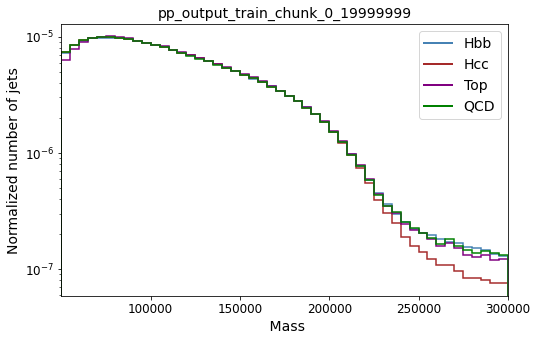

In [50]:
plt.figure(figsize = (8,5))

#Plotting the histograms

bins = plt.hist(jets_df[jets_df["flavour_label"] == 0]["mass"], bins=50, histtype='step', density = True, log = True, color = 'steelblue', lw =1.5)
plt.plot([], [],color = 'steelblue',linewidth=2, label='Hbb')
plt.hist(jets_df[jets_df["flavour_label"] == 1]["mass"], bins[1], histtype='step', density = True, log = True, color='brown', lw=1.5)
plt.plot([], [], color='brown', linewidth=2, label='Hcc')
plt.hist(jets_df[jets_df["flavour_label"] == 2]["mass"], bins[1], histtype='step', density = True, log = True, color='purple', lw=1.5)
plt.plot([], [], color='purple', linewidth=2, label='Top')
plt.hist(jets_df[jets_df["flavour_label"] == 3]["mass"], bins[1], histtype='step', density = True, log = True, color='green', lw=1.5)
plt.plot([], [], color='green', linewidth=2, label='QCD')


# set the axis labels and title
plt.xlabel(' Mass', fontsize=14)
plt.ylabel('Normalized number of jets', fontsize=14)
plt.xticks(fontsize = 12)
plt.yticks(fontsize = 12)
plt.xlim(50001,300000)
plt.title('pp_output_%s'%sample_name, fontsize = 14)
plt.legend(fontsize = 14)

plt.savefig(os.path.join('/lstore/calo/martafsilva/Xbb/Jet_color_ring/May19_Analysis/Jets_plots_May19','%s_mass.jpeg'%sample_name), dpi=300, bbox_inches='tight')

### PT

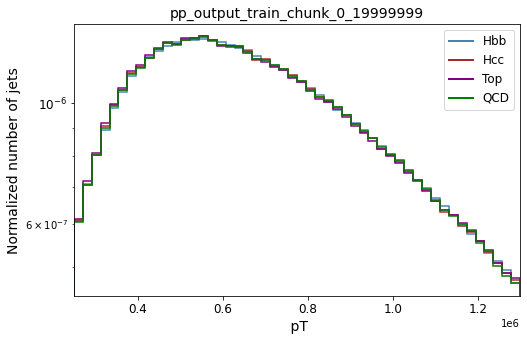

In [51]:
plt.figure(figsize = (8,5))

#Plotting the histograms

bins = plt.hist(jets_df[jets_df["flavour_label"] == 0]["pt"], bins=50, histtype='step', density = True, log = True, color = 'steelblue', lw =1.5)
plt.plot([], [],color = 'steelblue',linewidth=2, label='Hbb')
plt.hist(jets_df[jets_df["flavour_label"] == 1]["pt"], bins[1], histtype='step', density = True, log = True, color='brown', lw=1.5)
plt.plot([], [], color='brown', linewidth=2, label='Hcc')
plt.hist(jets_df[jets_df["flavour_label"] == 2]["pt"], bins[1], histtype='step', density = True, log = True, color='purple', lw=1.5)
plt.plot([], [], color='purple', linewidth=2, label='Top')
plt.hist(jets_df[jets_df["flavour_label"] == 3]["pt"], bins[1], histtype='step', density = True, log = True, color='green', lw=1.5)
plt.plot([], [], color='green', linewidth=2, label='QCD')


# set the axis labels and title
plt.xlabel(' pT', fontsize=14)
plt.ylabel('Normalized number of jets', fontsize=14)
plt.xticks(fontsize = 12)
plt.yticks(fontsize = 12)
plt.xlim(250027.67,1299992.2)
plt.title('pp_output_%s'%sample_name, fontsize = 14)

plt.legend(fontsize = 12)

plt.savefig(os.path.join('/lstore/calo/martafsilva/Xbb/Jet_color_ring/May19_Analysis/Jets_plots_May19','%s_pT.jpeg'%sample_name), dpi=300, bbox_inches='tight')

### Abs Eta

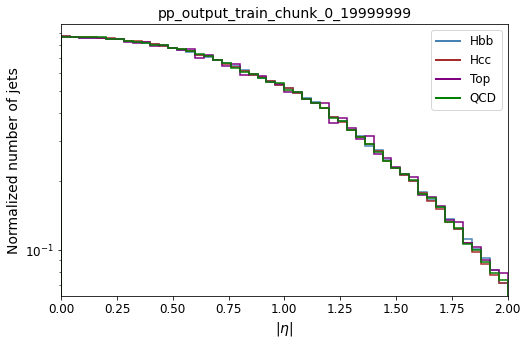

In [52]:
plt.figure(figsize = (8,5))

#Plotting the histograms

bins = plt.hist(jets_df[jets_df["flavour_label"] == 0]["abs_eta"], bins=50, histtype='step', density = True, log = True, color = 'steelblue', lw =1.5)
plt.plot([], [],color = 'steelblue',linewidth=2, label='Hbb')
plt.hist(jets_df[jets_df["flavour_label"] == 1]["abs_eta"], bins[1], histtype='step', density = True, log = True, color='brown', lw=1.5)
plt.plot([], [], color='brown', linewidth=2, label='Hcc')
plt.hist(jets_df[jets_df["flavour_label"] == 2]["abs_eta"], bins[1], histtype='step', density = True, log = True, color='purple', lw=1.5)
plt.plot([], [], color='purple', linewidth=2, label='Top')
plt.hist(jets_df[jets_df["flavour_label"] == 3]["abs_eta"], bins[1], histtype='step', density = True, log = True, color='green', lw=1.5)
plt.plot([], [], color='green', linewidth=2, label='QCD')


# set the axis labels and title
plt.xlabel(r'|$\eta$|', fontsize=14)
plt.ylabel('Normalized number of jets', fontsize=14)
plt.xticks(fontsize = 12)
plt.yticks(fontsize = 12)
plt.xlim(0,2)

plt.title('pp_output_%s'%sample_name, fontsize = 14)

plt.legend(fontsize = 12)

plt.savefig(os.path.join('/lstore/calo/martafsilva/Xbb/Jet_color_ring/May19_Analysis/Jets_plots_May19','%s_abs_eta.jpeg'%sample_name))


# Subjets

### pT

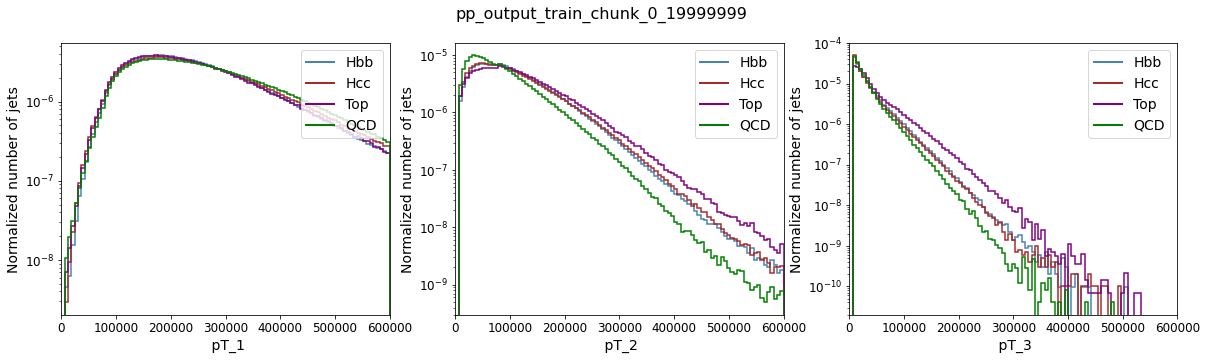

In [53]:
plt.figure(figsize = (20,5))
plt.subplot(1,3,1)

#Plotting the histograms
rang = np.linspace(0,600000,100)

bins1 = plt.hist(subjets_df[subjets_df["flavour_label"] == 0]["pt_1"], bins=rang, histtype='step', density = True, log = True, color = 'steelblue', lw =1.5)
plt.plot([], [],color = 'steelblue',linewidth=2, label='Hbb')
plt.hist(subjets_df[subjets_df["flavour_label"] == 1]["pt_1"], bins1[1], histtype='step', density = True, log = True, color='brown', lw=1.5)
plt.plot([], [], color='brown', linewidth=2, label='Hcc')
plt.hist(subjets_df[subjets_df["flavour_label"] == 2]["pt_1"], bins1[1], histtype='step', density = True, log = True, color='purple', lw=1.5)
plt.plot([], [], color='purple', linewidth=2, label='Top')
plt.hist(subjets_df[subjets_df["flavour_label"] == 3]["pt_1"], bins1[1], histtype='step', density = True, log = True, color='green', lw=1.5)
plt.plot([], [], color='green', linewidth=2, label='QCD')


# set the axis labels and title
plt.xlabel(' pT_1', fontsize=14)
plt.ylabel('Normalized number of jets', fontsize=14)
plt.xticks(fontsize = 12)
plt.yticks(fontsize = 12)
plt.xlim(0,600000)

plt.legend(fontsize = 14)

plt.subplot(1,3,2)

#Plotting the histograms

bins2 = plt.hist(subjets_df[subjets_df["flavour_label"] == 0]["pt_2"], bins=rang, histtype='step', density = True, log = True, color = 'steelblue', lw =1.5)
plt.plot([], [],color = 'steelblue',linewidth=2, label='Hbb')
plt.hist(subjets_df[subjets_df["flavour_label"] == 1]["pt_2"], bins2[1], histtype='step', density = True, log = True, color='brown', lw=1.5)
plt.plot([], [], color='brown', linewidth=2, label='Hcc')
plt.hist(subjets_df[subjets_df["flavour_label"] == 2]["pt_2"], bins2[1], histtype='step', density = True, log = True, color='purple', lw=1.5)
plt.plot([], [], color='purple', linewidth=2, label='Top')
plt.hist(subjets_df[subjets_df["flavour_label"] == 3]["pt_2"], bins2[1], histtype='step', density = True, log = True, color='green', lw=1.5)
plt.plot([], [], color='green', linewidth=2, label='QCD')

# set the axis labels and title
plt.xlabel(' pT_2', fontsize=14)
plt.ylabel('Normalized number of jets', fontsize=14)
plt.xticks(fontsize = 12)
plt.yticks(fontsize = 12)
plt.xlim(0,600000)

plt.legend(fontsize = 14)

plt.subplot(1,3,3)

#Plotting the histograms

bins3 = plt.hist(subjets_df[subjets_df["flavour_label"] == 0]["pt_3"], bins=rang, histtype='step', density = True, log = True, color = 'steelblue', lw =1.5)
plt.plot([], [],color = 'steelblue',linewidth=2, label='Hbb')
plt.hist(subjets_df[subjets_df["flavour_label"] == 1]["pt_3"], bins3[1], histtype='step', density = True, log = True, color='brown', lw=1.5)
plt.plot([], [], color='brown', linewidth=2, label='Hcc')
plt.hist(subjets_df[subjets_df["flavour_label"] == 2]["pt_3"], bins3[1], histtype='step', density = True, log = True, color='purple', lw=1.5)
plt.plot([], [], color='purple', linewidth=2, label='Top')
plt.hist(subjets_df[subjets_df["flavour_label"] == 3]["pt_3"], bins3[1], histtype='step', density = True, log = True, color='green', lw=1.5)
plt.plot([], [], color='green', linewidth=2, label='QCD')


# set the axis labels and title
plt.xlabel(' pT_3', fontsize=14)
plt.ylabel('Normalized number of jets', fontsize=14)
plt.xticks(fontsize = 12)
plt.yticks(fontsize = 12)
plt.xlim(0,600000)

plt.legend(fontsize = 14)

plt.suptitle('pp_output_%s'%sample_name, fontsize = 16)
plt.savefig(os.path.join('/lstore/calo/martafsilva/Xbb/Jet_color_ring/May19_Analysis/Subjets_Plots_May19','%s_pT.jpeg'%sample_name))


### Mass

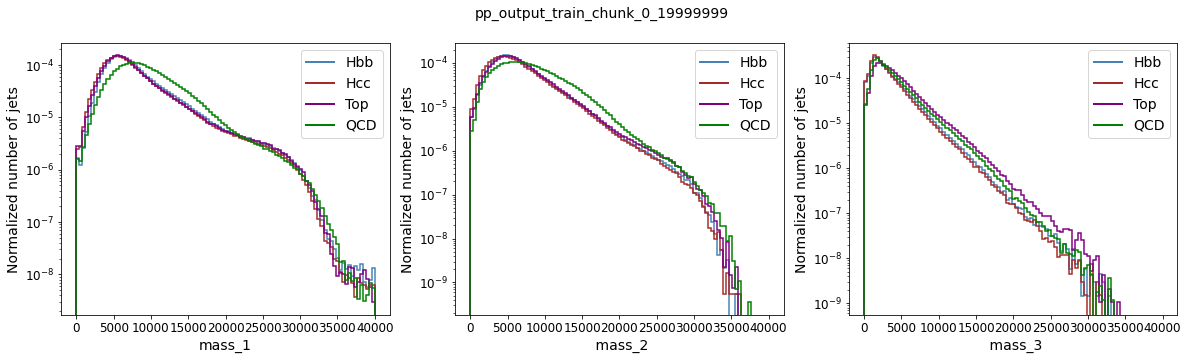

In [54]:
plt.figure(figsize = (20,5))
plt.subplot(1,3,1)

rang = np.linspace(0,40000,100)
#Plotting the histograms

bins1 = plt.hist(subjets_df[subjets_df["flavour_label"] == 0]["mass_1"], bins=rang, histtype='step', density = True, log = True, color = 'steelblue', lw =1.5)
plt.plot([], [],color = 'steelblue',linewidth=2, label='Hbb')
plt.hist(subjets_df[subjets_df["flavour_label"] == 1]["mass_1"], bins1[1], histtype='step', density = True, log = True, color='brown', lw=1.5)
plt.plot([], [], color='brown', linewidth=2, label='Hcc')
plt.hist(subjets_df[subjets_df["flavour_label"] == 2]["mass_1"], bins1[1], histtype='step', density = True, log = True, color='purple', lw=1.5)
plt.plot([], [], color='purple', linewidth=2, label='Top')
plt.hist(subjets_df[subjets_df["flavour_label"] == 3]["mass_1"], bins1[1], histtype='step', density = True, log = True, color='green', lw=1.5)
plt.plot([], [], color='green', linewidth=2, label='QCD')


# set the axis labels and title
plt.xlabel('mass_1', fontsize=14)
plt.ylabel('Normalized number of jets', fontsize=14)
plt.xticks(fontsize = 12)
plt.yticks(fontsize = 12)
#plt.xlim(0,40000)

plt.legend(fontsize = 14)

plt.subplot(1,3,2)

#Plotting the histograms

bins2 = plt.hist(subjets_df[subjets_df["flavour_label"] == 0]["mass_2"], bins=rang, histtype='step', density = True, log = True, color = 'steelblue', lw =1.5)
plt.plot([], [],color = 'steelblue',linewidth=2, label='Hbb')
plt.hist(subjets_df[subjets_df["flavour_label"] == 1]["mass_2"], bins2[1], histtype='step', density = True, log = True, color='brown', lw=1.5)
plt.plot([], [], color='brown', linewidth=2, label='Hcc')
plt.hist(subjets_df[subjets_df["flavour_label"] == 2]["mass_2"], bins2[1], histtype='step', density = True, log = True, color='purple', lw=1.5)
plt.plot([], [], color='purple', linewidth=2, label='Top')
plt.hist(subjets_df[subjets_df["flavour_label"] == 3]["mass_2"], bins2[1], histtype='step', density = True, log = True, color='green', lw=1.5)
plt.plot([], [], color='green', linewidth=2, label='QCD')


# set the axis labels and title
plt.xlabel(' mass_2', fontsize=14)
plt.ylabel('Normalized number of jets', fontsize=14)
plt.xticks(fontsize = 12)
plt.yticks(fontsize = 12)
#plt.xlim(0,35000)

plt.legend(fontsize = 14)

plt.subplot(1,3,3)

#Plotting the histograms

bins3 = plt.hist(subjets_df[subjets_df["flavour_label"] == 0]["mass_3"], bins=rang, histtype='step', density = True, log = True, color = 'steelblue', lw =1.5)
plt.plot([], [],color = 'steelblue',linewidth=2, label='Hbb')
plt.hist(subjets_df[subjets_df["flavour_label"] == 1]["mass_3"], bins3[1], histtype='step', density = True, log = True, color='brown', lw=1.5)
plt.plot([], [], color='brown', linewidth=2, label='Hcc')
plt.hist(subjets_df[subjets_df["flavour_label"] == 2]["mass_3"], bins3[1], histtype='step', density = True, log = True, color='purple', lw=1.5)
plt.plot([], [], color='purple', linewidth=2, label='Top')
plt.hist(subjets_df[subjets_df["flavour_label"] == 3]["mass_3"], bins3[1], histtype='step', density = True, log = True, color='green', lw=1.5)
plt.plot([], [], color='green', linewidth=2, label='QCD')


# set the axis labels and title
plt.xlabel(' mass_3', fontsize=14)
plt.ylabel('Normalized number of jets', fontsize=14)
plt.xticks(fontsize = 12)
plt.yticks(fontsize = 12)
##plt.xlim(0,30000)
plt.legend(fontsize = 14)


plt.suptitle('pp_output_%s'%sample_name, fontsize = 14)
plt.savefig(os.path.join('/lstore/calo/martafsilva/Xbb/Jet_color_ring/May19_Analysis/Subjets_Plots_May19','%s_mass.jpeg'%sample_name))

### Deta

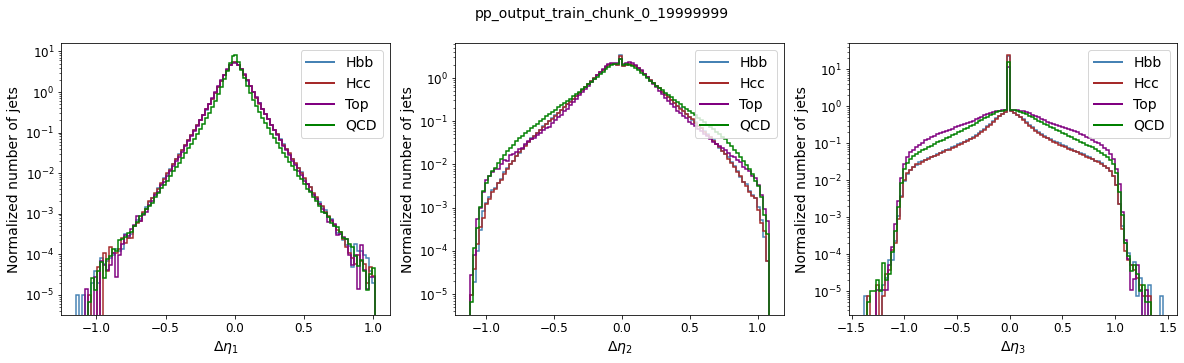

In [55]:
plt.figure(figsize = (20,5))
plt.subplot(1,3,1)

#Plotting the histograms

bins1 = plt.hist(subjets_df[subjets_df["flavour_label"] == 0]["deta_1"], bins=100, histtype='step', density = True, log = True, color = 'steelblue', lw =1.5)
plt.plot([], [],color = 'steelblue',linewidth=2, label='Hbb')
plt.hist(subjets_df[subjets_df["flavour_label"] == 1]["deta_1"], bins1[1], histtype='step', density = True, log = True, color='brown', lw=1.5)
plt.plot([], [], color='brown', linewidth=2, label='Hcc')
plt.hist(subjets_df[subjets_df["flavour_label"] == 2]["deta_1"],bins1[1], histtype='step', density = True, log = True, color='purple', lw=1.5)
plt.plot([], [], color='purple', linewidth=2, label='Top')
plt.hist(subjets_df[subjets_df["flavour_label"] == 3]["deta_1"], bins1[1], histtype='step', density = True, log = True, color='green', lw=1.5)
plt.plot([], [], color='green', linewidth=2, label='QCD')


# set the axis labels and title
plt.xlabel(r'$\Delta \eta_1$', fontsize=14)
plt.ylabel('Normalized number of jets', fontsize=14)
plt.xticks(fontsize = 12)
plt.yticks(fontsize = 12)


plt.legend(fontsize = 14)

plt.subplot(1,3,2)

#Plotting the histograms

bins2 = plt.hist(subjets_df[subjets_df["flavour_label"] == 0]["deta_2"], bins=100, histtype='step', density = True, log = True, color = 'steelblue', lw =1.5)
plt.plot([], [],color = 'steelblue',linewidth=2, label='Hbb')
plt.hist(subjets_df[subjets_df["flavour_label"] == 1]["deta_2"], bins2[1], histtype='step', density = True, log = True, color='brown', lw=1.5)
plt.plot([], [], color='brown', linewidth=2, label='Hcc')
plt.hist(subjets_df[subjets_df["flavour_label"] == 2]["deta_2"], bins2[1], histtype='step', density = True, log = True, color='purple', lw=1.5)
plt.plot([], [], color='purple', linewidth=2, label='Top')
plt.hist(subjets_df[subjets_df["flavour_label"] == 3]["deta_2"], bins2[1], histtype='step', density = True, log = True, color='green', lw=1.5)
plt.plot([], [], color='green', linewidth=2, label='QCD')


# set the axis labels and title
plt.xlabel(r'$\Delta \eta_2$', fontsize=14)
plt.ylabel('Normalized number of jets', fontsize=14)
plt.xticks(fontsize = 12)
plt.yticks(fontsize = 12)


plt.legend(fontsize = 14)

plt.subplot(1,3,3)

#Plotting the histograms

bins3 = plt.hist(subjets_df[subjets_df["flavour_label"] == 0]["deta_3"], bins=100, histtype='step', density = True, log = True, color = 'steelblue', lw =1.5)
plt.plot([], [],color = 'steelblue',linewidth=2, label='Hbb')
plt.hist(subjets_df[subjets_df["flavour_label"] == 1]["deta_3"],bins3[1], histtype='step', density = True, log = True, color='brown', lw=1.5)
plt.plot([], [], color='brown', linewidth=2, label='Hcc')
plt.hist(subjets_df[subjets_df["flavour_label"] == 2]["deta_3"], bins3[1], histtype='step', density = True, log = True, color='purple', lw=1.5)
plt.plot([], [], color='purple', linewidth=2, label='Top')
plt.hist(subjets_df[subjets_df["flavour_label"] == 3]["deta_3"], bins3[1], histtype='step', density = True, log = True, color='green', lw=1.5)
plt.plot([], [], color='green', linewidth=2, label='QCD')


# set the axis labels and title
plt.xlabel(r'$\Delta \eta_3$', fontsize=14)
plt.ylabel('Normalized number of jets', fontsize=14)
plt.xticks(fontsize = 12)
plt.yticks(fontsize = 12)


plt.legend(fontsize = 14)

plt.suptitle('pp_output_%s'%sample_name, fontsize = 14)
plt.savefig(os.path.join('/lstore/calo/martafsilva/Xbb/Jet_color_ring/May19_Analysis/Subjets_Plots_May19','%s_deta.jpeg'%sample_name))

### dphi

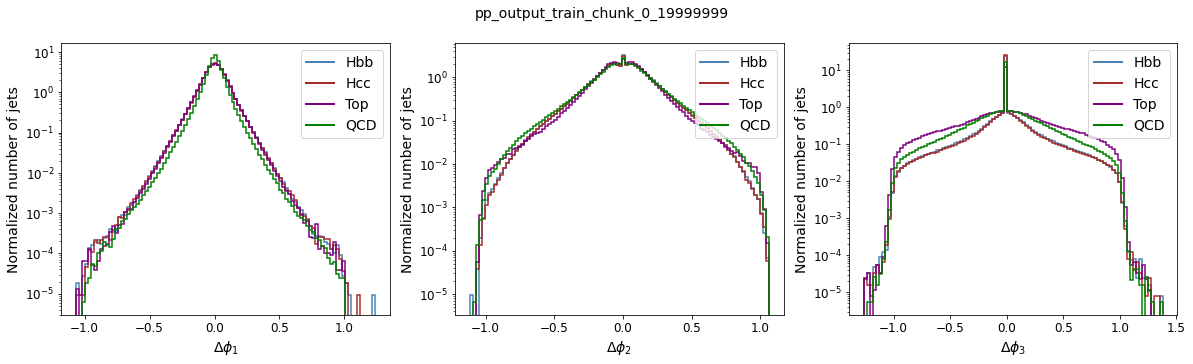

In [56]:
plt.figure(figsize = (20,5))
plt.subplot(1,3,1)

#Plotting the histograms

bins1 = plt.hist(subjets_df[subjets_df["flavour_label"] == 0]["dphi_1"], bins=100, histtype='step', density = True, log = True, color = 'steelblue', lw =1.5)
plt.plot([], [],color = 'steelblue',linewidth=2, label='Hbb')
plt.hist(subjets_df[subjets_df["flavour_label"] == 1]["dphi_1"], bins1[1], histtype='step', density = True, log = True, color='brown', lw=1.5)
plt.plot([], [], color='brown', linewidth=2, label='Hcc')
plt.hist(subjets_df[subjets_df["flavour_label"] == 2]["dphi_1"], bins1[1], histtype='step', density = True, log = True, color='purple', lw=1.5)
plt.plot([], [], color='purple', linewidth=2, label='Top')
plt.hist(subjets_df[subjets_df["flavour_label"] == 3]["dphi_1"], bins1[1], histtype='step', density = True, log = True, color='green', lw=1.5)
plt.plot([], [], color='green', linewidth=2, label='QCD')


# set the axis labels and title
plt.xlabel(r'$\Delta \phi_1$', fontsize=14)
plt.ylabel('Normalized number of jets', fontsize=14)
plt.xticks(fontsize = 12)
plt.yticks(fontsize = 12)


plt.legend(fontsize = 14)

plt.subplot(1,3,2)

#Plotting the histograms

bins2 = plt.hist(subjets_df[subjets_df["flavour_label"] == 0]["dphi_2"], bins=100, histtype='step', density = True, log = True, color = 'steelblue', lw =1.5)
plt.plot([], [],color = 'steelblue',linewidth=2, label='Hbb')
plt.hist(subjets_df[subjets_df["flavour_label"] == 1]["dphi_2"], bins2[1], histtype='step', density = True, log = True, color='brown', lw=1.5)
plt.plot([], [], color='brown', linewidth=2, label='Hcc')
plt.hist(subjets_df[subjets_df["flavour_label"] == 2]["dphi_2"], bins2[1], histtype='step', density = True, log = True, color='purple', lw=1.5)
plt.plot([], [], color='purple', linewidth=2, label='Top')
plt.hist(subjets_df[subjets_df["flavour_label"] == 3]["dphi_2"], bins2[1], histtype='step', density = True, log = True, color='green', lw=1.5)
plt.plot([], [], color='green', linewidth=2, label='QCD')


# set the axis labels and title
plt.xlabel(r'$\Delta \phi_2$', fontsize=14)
plt.ylabel('Normalized number of jets', fontsize=14)
plt.xticks(fontsize = 12)
plt.yticks(fontsize = 12)


plt.legend(fontsize = 14)

plt.subplot(1,3,3)

#Plotting the histograms

bins3 = plt.hist(subjets_df[subjets_df["flavour_label"] == 0]["dphi_3"], bins=100, histtype='step', density = True, log = True, color = 'steelblue', lw =1.5)
plt.plot([], [],color = 'steelblue',linewidth=2, label='Hbb')
plt.hist(subjets_df[subjets_df["flavour_label"] == 1]["dphi_3"], bins3[1], histtype='step', density = True, log = True, color='brown', lw=1.5)
plt.plot([], [], color='brown', linewidth=2, label='Hcc')
plt.hist(subjets_df[subjets_df["flavour_label"] == 2]["dphi_3"], bins3[1], histtype='step', density = True, log = True, color='purple', lw=1.5)
plt.plot([], [], color='purple', linewidth=2, label='Top')
plt.hist(subjets_df[subjets_df["flavour_label"] == 3]["dphi_3"], bins3[1], histtype='step', density = True, log = True, color='green', lw=1.5)
plt.plot([], [], color='green', linewidth=2, label='QCD')


# set the axis labels and title
plt.xlabel(r'$\Delta \phi_3$', fontsize=14)
plt.ylabel('Normalized number of jets', fontsize=14)
plt.xticks(fontsize = 12)
plt.yticks(fontsize = 12)


plt.legend(fontsize = 14)
plt.suptitle('pp_output_%s'%sample_name, fontsize = 14)
plt.savefig(os.path.join('/lstore/calo/martafsilva/Xbb/Jet_color_ring/May19_Analysis/Subjets_Plots_May19','%s_dphi.jpeg'%sample_name))